In [46]:
# import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.14.0


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2023-12-06 09:54:15--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2023-12-06 09:54:15 (9.52 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2023-12-06 09:54:15--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

In [3]:
# Inspect the files
! head -n 5 ./train-data.tsv

ham	ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
ham	you can never do nothing
ham	now u sound like manky scouse boy steve,like! i is travelling on da bus home.wot has u inmind 4 recreation dis eve?
ham	mum say we wan to go then go... then she can shun bian watch da glass exhibition...
ham	never y lei... i v lazy... got wat? dat day ü send me da url cant work one...


In [4]:
! head -n 5 ./valid-data.tsv

ham	i am in hospital da. . i will return home in evening
ham	not much, just some textin'. how bout you?
ham	i probably won't eat at all today. i think i'm gonna pop. how was your weekend? did u miss me?
ham	don‘t give a flying monkeys wot they think and i certainly don‘t mind. any friend of mine and all that!
ham	who are you seeing?


In [5]:
df_train = pd.read_csv(train_file_path, delimiter='\t', header=None, names=['class', 'message'])
df_test = pd.read_csv(test_file_path, delimiter='\t', header=None, names=['class', 'message'])

In [6]:
df_train

,class,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [7]:
df_test

,class,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [8]:
# missing/invalid values in the training dataset.
invalid_values_train = df_train.isnull().sum(axis=1)
invalid_rows_train = invalid_values_train[invalid_values_train > 0]
num_invalid_rows_train = invalid_rows_train.shape[0]
num_invalid_rows_train

0

In [9]:
# Make sure all values are either ham or spam in the training dataset
df_train['class'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
# Make sure all values are either ham or spam in the validation/testing dataset
df_test['class'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
# one-hot encoding the test/train datasets class columns
df_train['class'] = df_train['class'].replace(to_replace={'spam': 0, 'ham': 1})
df_test['class'] = df_test['class'].replace(to_replace={'spam': 0, 'ham': 1})

print('\n\ndf_train unique class values:', df_train['class'].unique())
print('df_test unique class values:', df_test['class'].unique())



df_train unique class values: [1 0]
df_test unique class values: [1 0]


In [12]:
# Check data types
print('train datatypes:', df_train.dtypes)
print('test datatypes:', df_test.dtypes)

train datatypes: class       int64
message    object
dtype: object
test datatypes: class       int64
message    object
dtype: object


In [13]:
# missing/invalid values in the testing dataset.
invalid_values_test = df_test.isnull().sum(axis=1)
invalid_rows_test = invalid_values_test[invalid_values_test > 0]
num_invalid_rows_test = invalid_rows_test.shape[0]
num_invalid_rows_test

0

In [14]:
df_train.describe()

,class
count,4179.000000
mean,0.865997
std,0.340697
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
df_test.describe()

,class
count,1392.000000
mean,0.865661
std,0.341139
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
duplicates = df_train[df_train.duplicated()]
duplicates

,class,message
298,0,want to funk up ur fone with a weekly new tone...
385,1,ok then i will come to ur home after half an hour
489,1,"watching cartoon, listening music &amp; at eve..."
494,1,"sorry, i'll call later"
525,1,"sorry, i'll call later"
...,...,...
4131,0,hmv bonus special 500 pounds of genuine hmv vo...
4137,0,you won't believe it but it's true. it's incre...
4143,0,free message activate your 500 free text messa...
4148,1,"hi, mobile no. &lt;#&gt; has added you in th..."


In [17]:
# Drop duplicates - why re-train on the same messages?
df_train = df_train.drop_duplicates()
df_train

,class,message
0,1,ahhhh...just woken up!had a bad dream about u ...
1,1,you can never do nothing
2,1,"now u sound like manky scouse boy steve,like! ..."
3,1,mum say we wan to go then go... then she can s...
4,1,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,1,just woke up. yeesh its late. but i didn't fal...
4175,1,what do u reckon as need 2 arrange transport i...
4176,0,free entry into our £250 weekly competition ju...
4177,0,-pls stop bootydelious (32/f) is inviting you ...


In [18]:
# Let's take a look at the distribution of lengths of the text messages
# Training messages
train_msg_lengths = df_train.message.apply(len)
print('Training messages:')
print('The longest message is', max(train_msg_lengths), 'characters')
print('Longest message:', max(df_train.message, key=len))
print('The shortest message:', min(df_train.message, key=len), '\n')
print(train_msg_lengths)

# Testing/validation messages
test_msg_lengths = df_test.message.apply(len)
print('\n\nvalidation/testing messages')
print('The longest message is', max(test_msg_lengths), 'characters')
print('Longest message:', max(df_test.message, key=len))
print('The shortest message:', min(df_test.message, key=len), '\n')
print(test_msg_lengths)

Training messages:
The longest message is 910 characters
Longest message: for me the love should start with attraction.i should feel that i need her every time around me.she should be the first thing which comes in my thoughts.i would start the day and end it with her.she should be there every time i dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.i would cry for her.will give all my happiness and take all her sorrows.i will be ready to fight with anyone for her.i will be in love when i will be doing the craziest things for her.love will be when i don't have to proove anyone that my girl is the most beautiful lady on the whole planet.i will always be singing praises for her.love will be when i start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.i would like to say a lot..will tell later..
The shortest me

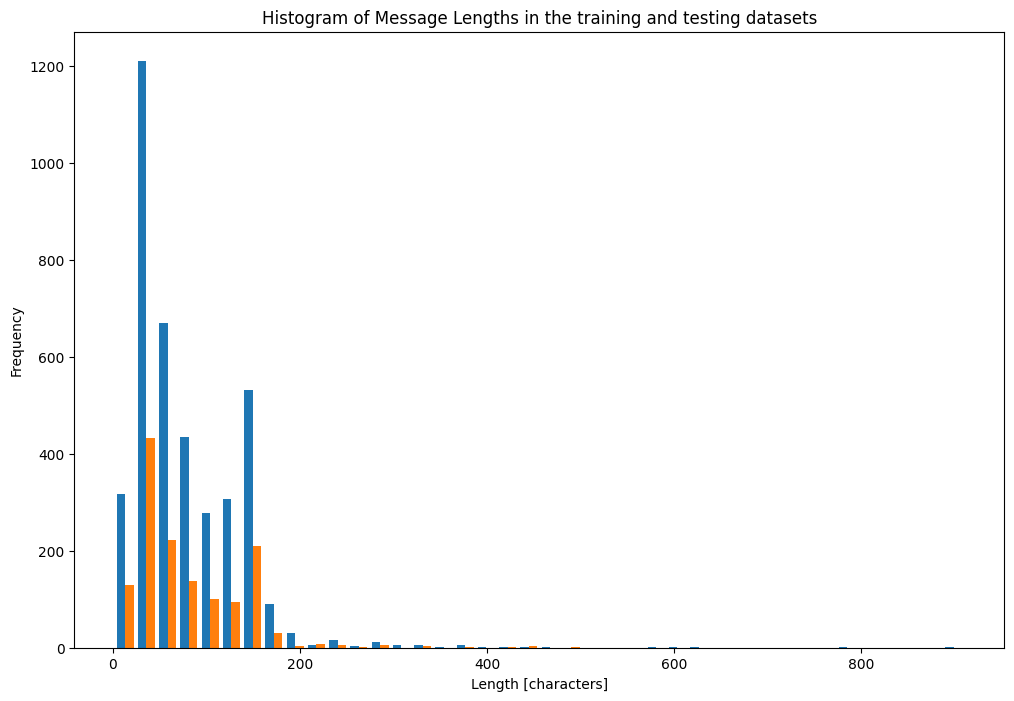

In [19]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.hist([train_msg_lengths, test_msg_lengths], bins=40)
plt.title('Histogram of Message Lengths in the training and testing datasets')
plt.xlabel('Length [characters]')
plt.ylabel('Frequency')
plt.show()


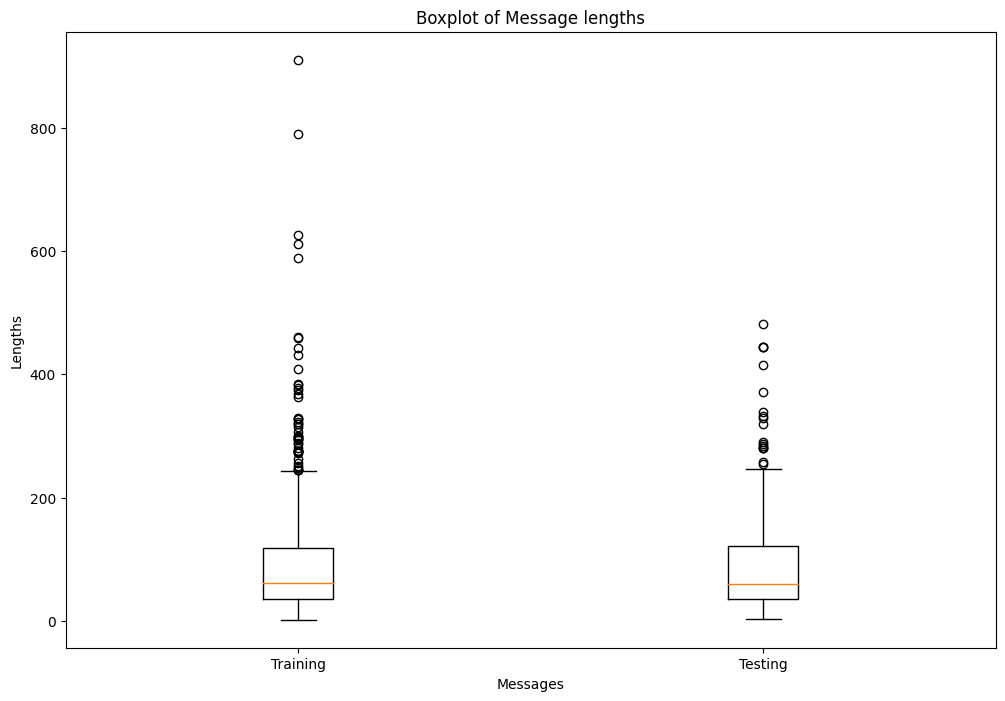

In [20]:
# create boxplot of the message lengths

plt.rcParams['figure.figsize'] = (12, 8)
msg_len_data = [train_msg_lengths, test_msg_lengths]
plt.boxplot(msg_len_data, labels=['Training', 'Testing'])

# add title and axis labels
plt.title('Boxplot of Message lengths')
plt.xlabel('Messages')
plt.ylabel('Lengths')

# show the plot
plt.show()

In [21]:
train_class_count = df_train['class'].value_counts().values
test_class_count = df_test['class'].value_counts().values
print('test dataset class count:', test_class_count)

test dataset class count: [1205  187]


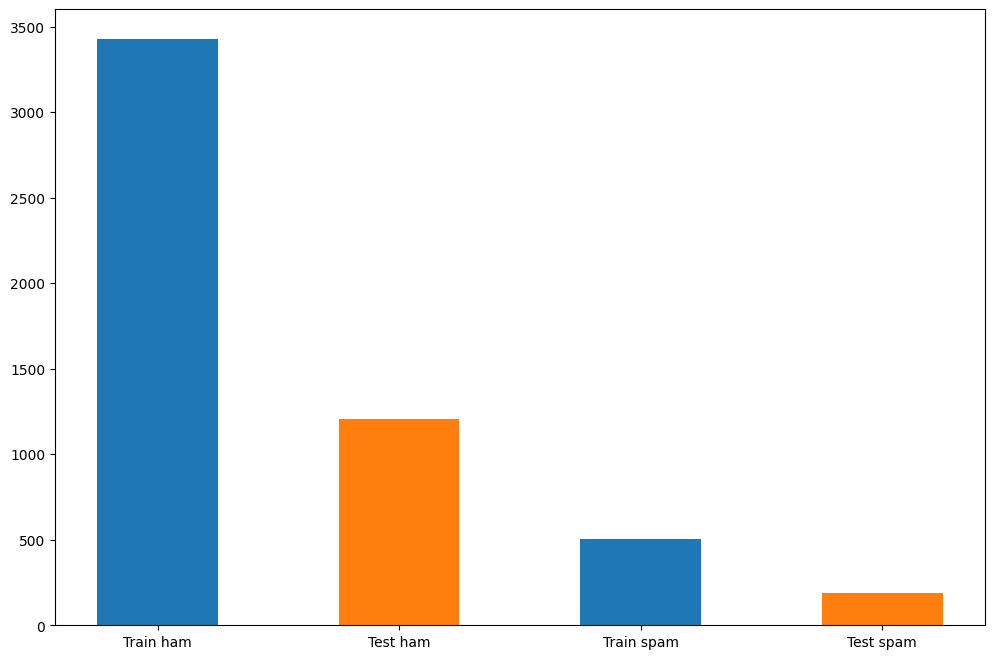

In [22]:
bar_width = 0.5
plt.bar([1,3],train_class_count, width=bar_width)
plt.bar([2,4],test_class_count, width=bar_width)
plt.xticks([1,2,3,4],['Train ham', 'Test ham', 'Train spam', 'Test spam'])
plt.show()

In [23]:
# Create the tensorflow training dataset
train_labels =  df_train["class"].values
train_ds = tf.data.Dataset.from_tensor_slices(
    (df_train["message"].values, train_labels)
)

# Print a couple of lines to see what it looks like
for i, e in enumerate(train_ds.as_numpy_iterator()):
  print(e)
  if i == 5:
    break

(b'ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.', 1)
(b'you can never do nothing', 1)
(b'now u sound like manky scouse boy steve,like! i is travelling on da bus home.wot has u inmind 4 recreation dis eve?', 1)
(b'mum say we wan to go then go... then she can shun bian watch da glass exhibition...', 1)
(b'never y lei... i v lazy... got wat? dat day \xc3\xbc send me da url cant work one...', 1)
(b'in xam hall boy asked girl tell me the starting term for dis answer i can den manage on my own after lot of hesitation n lookin around silently she said the! intha ponnungale ipaditan;)', 1)


In [24]:
# Create the tensorflow testing dataset
test_labels =  df_test["class"].values
test_ds = tf.data.Dataset.from_tensor_slices(
    (df_test["message"].values, test_labels)
)

# Print a couple of lines to see what it looks like
for i, e in enumerate(test_ds.as_numpy_iterator()):
  print(e)
  if i == 5:
    break

(b'i am in hospital da. . i will return home in evening', 1)
(b"not much, just some textin'. how bout you?", 1)
(b"i probably won't eat at all today. i think i'm gonna pop. how was your weekend? did u miss me?", 1)
(b'don\xe2\x80\x98t give a flying monkeys wot they think and i certainly don\xe2\x80\x98t mind. any friend of mine and all that!', 1)
(b'who are you seeing?', 1)
(b'your opinion about me? 1. over 2. jada 3. kusruthi 4. lovable 5. silent 6. spl character 7. not matured 8. stylish 9. simple pls reply..', 1)


In [25]:
print(len(df_train))

3935


In [26]:
BUFFER_SIZE = 1000
BATCH_SIZE = 128

In [27]:
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [28]:
vec = tf.keras.layers.TextVectorization(
    output_mode='int',  # Vectorize the text as integers
    max_tokens=2000,  # Most important words should fit inside a 2K word vocab.
    output_sequence_length=500,  # Will fit most sentences, except a few outliers
)

# the map function only returns the text, we're not adapting the labels which
# are ignored by the function.
vec.adapt(train_ds.map(lambda text, label: text))

In [29]:
vocab = np.array(vec.get_vocabulary())
vocab[:32]

array(['', '[UNK]', 'i', 'to', 'you', 'a', 'the', 'u', 'and', 'in', 'is',
       'me', 'my', 'for', 'your', 'of', 'it', 'have', 'on', 'call',
       'that', 'are', 'im', 'now', '2', 'but', 'so', 'not', 'at', 'can',
       'or', 'do'], dtype='<U19')

In [30]:
example_text = str(df_train.message[0])
example_text

'ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.'

In [31]:
encoded_example = vec([example_text]).numpy()

print(encoded_example[0][:35])



[  1   1   1   5 379 841  81   7   1   2  45  57   7 154  23   2 180  55
 160  81   1 107  25   2 288  22  41  13  16   0   0   0   0   0   0]


In [32]:
vocab = np.array(vec.get_vocabulary())
print("Original: ", example_text)
decoded_example = " ".join(vocab[encoded_example[0]])
print("Round-trip: ", decoded_example)

Original:  ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
Round-trip:  [UNK] [UNK] [UNK] a bad dream about u [UNK] i dont like u right now i didnt know anything about [UNK] night but i guess im up for it                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       


In [33]:
# Create the model
model = tf.keras.Sequential([
    vec,
    tf.keras.layers.Embedding(
        len(vec.get_vocabulary()),  # Input dim: size of vocab
        64,  # output dim: Dimension of the dense embedding
        mask_zero=True,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'],
)

In [34]:
val_steps = len(df_test)/BATCH_SIZE
val_steps

10.875

In [35]:

history = model.fit(
    train_ds,
    validation_data=test_ds,
    validation_steps=val_steps,
    epochs=16,
)

Epoch 1/16
31/31 [==============================] - 159s 4s/step - loss: 0.6828 - accuracy: 0.1283 - val_loss: 0.6662 - val_accuracy: 0.1343
Epoch 2/16
31/31 [==============================] - 129s 4s/step - loss: 0.6388 - accuracy: 0.1296 - val_loss: 0.5996 - val_accuracy: 0.1358
Epoch 3/16
31/31 [==============================] - 121s 4s/step - loss: 0.5372 - accuracy: 0.4727 - val_loss: 0.4882 - val_accuracy: 0.7249
Epoch 4/16
31/31 [==============================] - 129s 4s/step - loss: 0.4440 - accuracy: 0.7802 - val_loss: 0.4038 - val_accuracy: 0.8161
Epoch 5/16
31/31 [==============================] - 129s 4s/step - loss: 0.3481 - accuracy: 0.8562 - val_loss: 0.2984 - val_accuracy: 0.8851
Epoch 6/16
31/31 [==============================] - 121s 4s/step - loss: 0.2433 - accuracy: 0.9291 - val_loss: 0.2021 - val_accuracy: 0.9547
Epoch 7/16
31/31 [==============================] - 122s 4s/step - loss: 0.1722 - accuracy: 0.9654 - val_loss: 0.1453 - val_accuracy: 0.9720
Epoch 8/16
31

In [36]:
for i, e in enumerate(history.history['val_accuracy']):
  print(f'validation accuracy for epoch {i+1}: {round(100*e, 2)} %')

validation accuracy for epoch 1: 13.43 %
validation accuracy for epoch 2: 13.58 %
validation accuracy for epoch 3: 72.49 %
validation accuracy for epoch 4: 81.61 %
validation accuracy for epoch 5: 88.51 %
validation accuracy for epoch 6: 95.47 %
validation accuracy for epoch 7: 97.2 %
validation accuracy for epoch 8: 97.34 %
validation accuracy for epoch 9: 97.63 %
validation accuracy for epoch 10: 97.49 %
validation accuracy for epoch 11: 98.06 %
validation accuracy for epoch 12: 98.35 %
validation accuracy for epoch 13: 98.56 %
validation accuracy for epoch 14: 98.56 %
validation accuracy for epoch 15: 98.56 %
validation accuracy for epoch 16: 98.49 %


In [37]:
for i, e in enumerate(history.history['loss']):
  print(f'loss for epoch {i+1}: {round(e, 3)}')

loss for epoch 1: 0.683
loss for epoch 2: 0.639
loss for epoch 3: 0.537
loss for epoch 4: 0.444
loss for epoch 5: 0.348
loss for epoch 6: 0.243
loss for epoch 7: 0.172
loss for epoch 8: 0.122
loss for epoch 9: 0.086
loss for epoch 10: 0.065
loss for epoch 11: 0.053
loss for epoch 12: 0.046
loss for epoch 13: 0.037
loss for epoch 14: 0.03
loss for epoch 15: 0.027
loss for epoch 16: 0.025


In [38]:
def plot_graphs(h, metric):
    plt.plot(h.history[metric])
    plt.plot(h.history['val_'+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.715670440159738)

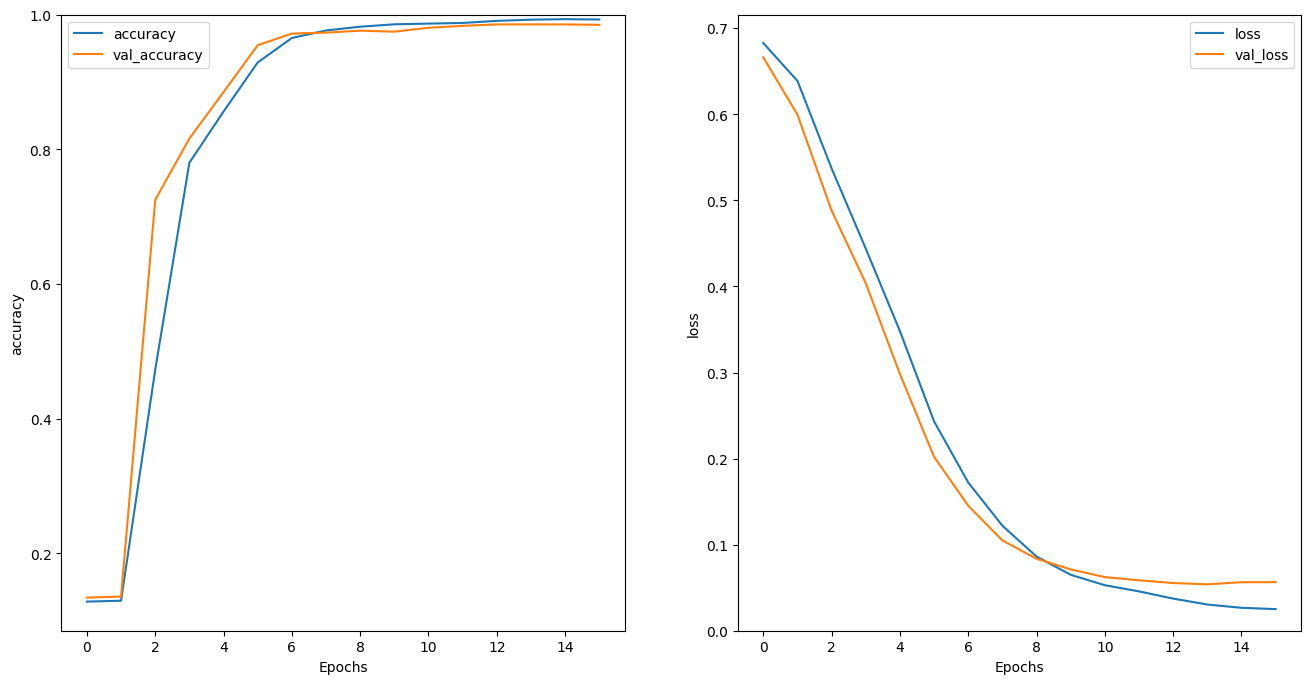

In [39]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [44]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    ps = model.predict([pred_text])
    print(ps)
    p = ps[0][0]
    result = [p, "ham" if p > 0.5 else "spam"]
    print(result)
    return [p, "ham" if p > 0.5 else "spam"]


pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 6s 6s/step
[[4.972941]]
[4.972941, 'ham']
[4.972941, 'ham']


In [45]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 153ms/step
[[4.972941]]
[4.972941, 'ham']
1/1 [==============================] - 0s 135ms/step
[[-1.8752335]]
[-1.8752335, 'spam']
1/1 [==============================] - 0s 141ms/step
[[11.287789]]
[11.287789, 'ham']
1/1 [==============================] - 0s 134ms/step
[[-3.5293653]]
[-3.5293653, 'spam']
1/1 [==============================] - 0s 139ms/step
[[-4.3133583]]
[-4.3133583, 'spam']
1/1 [==============================] - 0s 145ms/step
[[7.9865665]]
[7.9865665, 'ham']
1/1 [==============================] - 0s 141ms/step
[[10.22383]]
[10.22383, 'ham']
You passed the challenge. Great job!
